# Exploratory Data Analysis (EDA)

## 🎯 Concept Primer

EDA reveals patterns, relationships, and potential issues in your data. **Visualization is your best friend** for understanding what's happening.

### EDA Goals
- **Univariate:** Individual feature distributions
- **Bivariate:** Relationships between features and target
- **Correlations:** Which features move together?
- **Class stratification:** How do distributions differ by diabetes status?

**Expected outputs:** 4-6 plots saved to `/images/diabetes_*.png`

## 📋 Objectives

By the end of this notebook, you will:
1. Create histograms/KDEs for continuous features
2. Create bar charts for categorical features
3. Build a correlation heatmap
4. Visualize key features stratified by diabetes outcome
5. Save plots to `/images/`

## ✅ Acceptance Criteria

You'll know you're done when:
- [ ] At least 4 informative plots created
- [ ] Correlation heatmap shows numeric feature relationships
- [ ] Key features visualized stratified by diabetes status
- [ ] Plots saved to `/images/diabetes_*.png`
- [ ] Initial feature importance intuitions documented

## 🔧 Setup

In [1]:
# TODO 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 📊 Univariate Distributions

### TODO 2: Plot continuous features

**Features to visualize:** BMI, MentHlth, PhysHlth, Age

**Use:** Histograms (`plt.hist`) or KDE plots (`sns.distplot`)

**Questions:**
- Are distributions normal or skewed?
- Any obvious outliers?

In [5]:
df = pd.read_csv("../../../datasets/diabetes_BRFSS2015.csv")


df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()


,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,...,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
0,Yes,Yes,Yes,40.0,Yes,No,No,No,No,Yes,...,No,5.0,18.0,15.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"Less than $20,000",No Diabetes
1,No,No,No,25.0,Yes,No,No,Yes,No,No,...,Yes,3.0,0.0,0.0,No,Female,50-54,College 4+ years (College graduate),"Less than $10,000",No Diabetes
2,Yes,Yes,Yes,28.0,No,No,No,No,Yes,No,...,Yes,5.0,30.0,30.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"$75,000 or more",No Diabetes
3,Yes,No,Yes,27.0,No,No,No,Yes,Yes,Yes,...,No,2.0,0.0,0.0,No,Female,70-74,Grades 9-11 (Some high school),"Less than $50,000",No Diabetes
4,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,Yes,...,No,2.0,3.0,0.0,No,Female,70-74,College 1-3 years (Some college/technical school),"Less than $25,000",No Diabetes


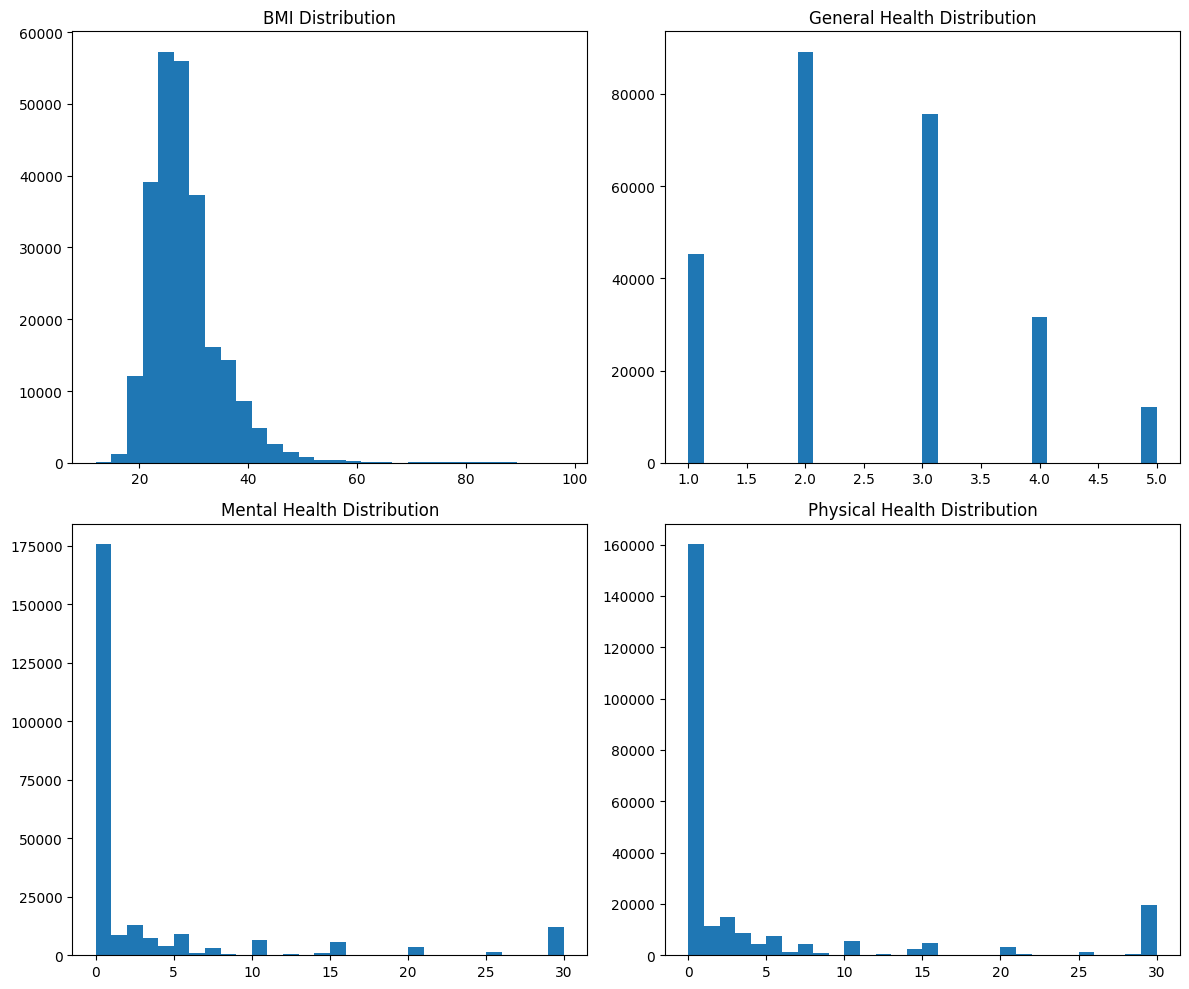

In [24]:
# TODO 2: Continuous distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].hist(df['bmi'], bins=30)
axes[0, 0].set_title('BMI Distribution')

axes[0, 1].hist(df['genhlth'], bins=30)
axes[0, 1].set_title('General Health Distribution')

axes[1, 0].hist(df['menthlth'], bins=30)
axes[1, 0].set_title('Mental Health Distribution')

axes[1, 1].hist(df['physhlth'], bins=30)
axes[1, 1].set_title('Physical Health Distribution')

plt.tight_layout()
# plt.savefig('../../images/diabetes_univariate.png', dpi=150)
# plt.show()

## 🔗 Correlation Heatmap

### TODO 3: Create correlation matrix

**Use:** `df.corr()` then `sns.heatmap()`

**Questions:**
- Which features correlate strongly with target?
- Any multicollinearity? (high feature-to-feature correlation)

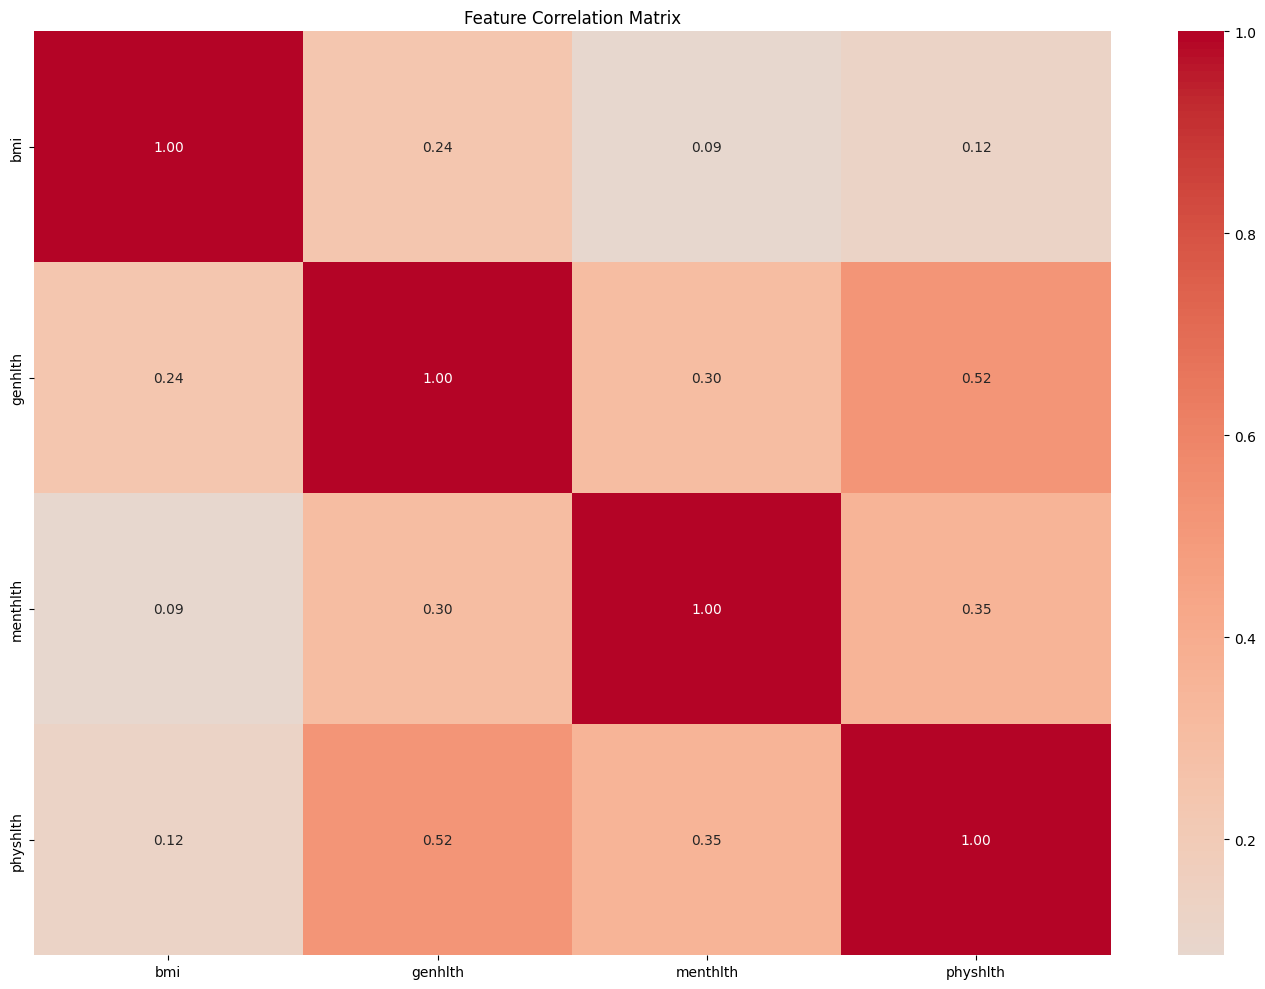

In [27]:
# TODO 3: Correlation heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../images/diabetes_correlation.png', dpi=150)
plt.show()

## 🎯 Stratified by Target

### TODO 4: Compare distributions by diabetes status

**Visualize:** How do distributions differ between diabetes=Yes vs No?

**Features:** BMI, HighBP, PhysActivity

**Use:** `sns.boxplot` or `sns.violinplot` with `hue='diabetes_binary'`

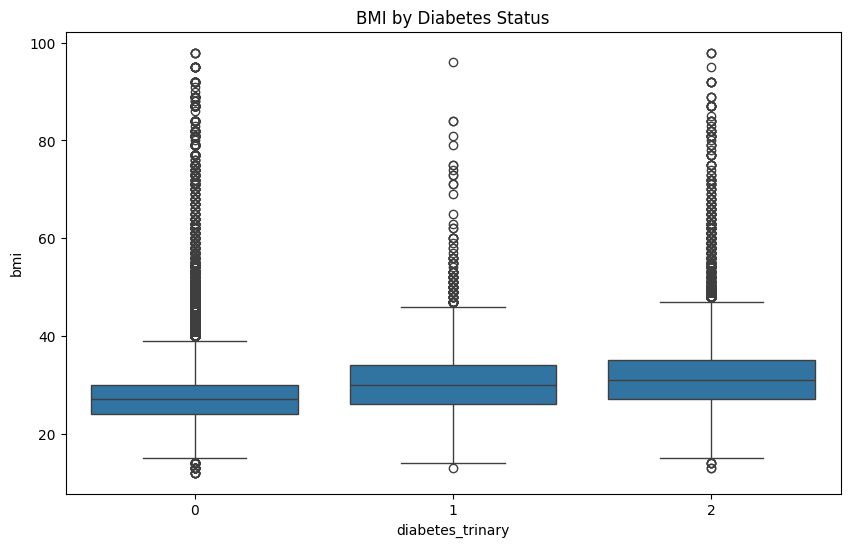

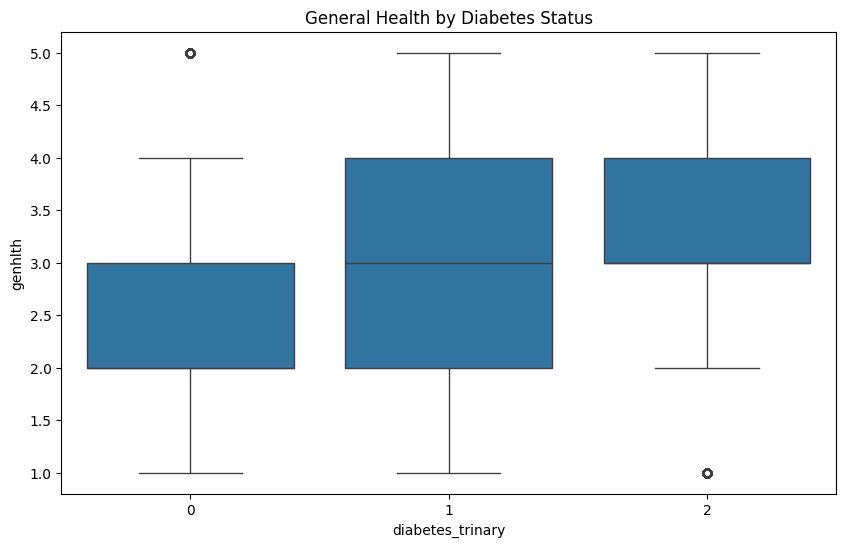

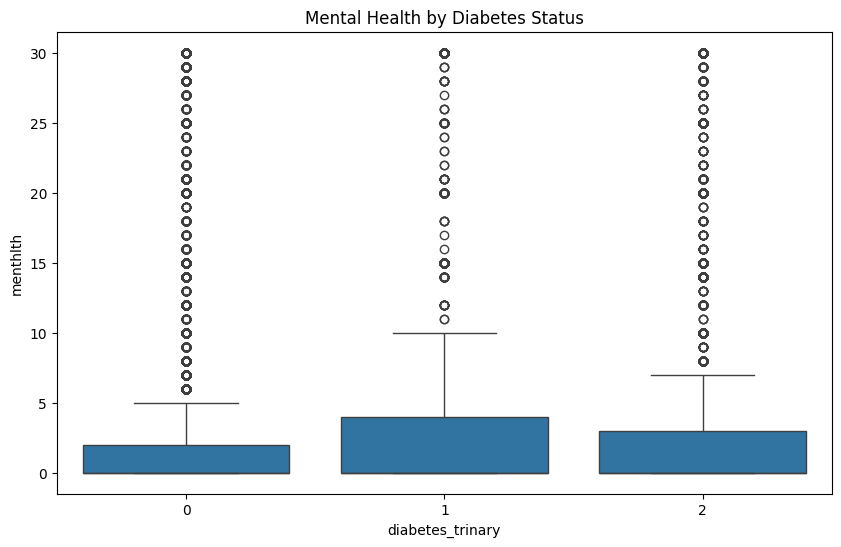

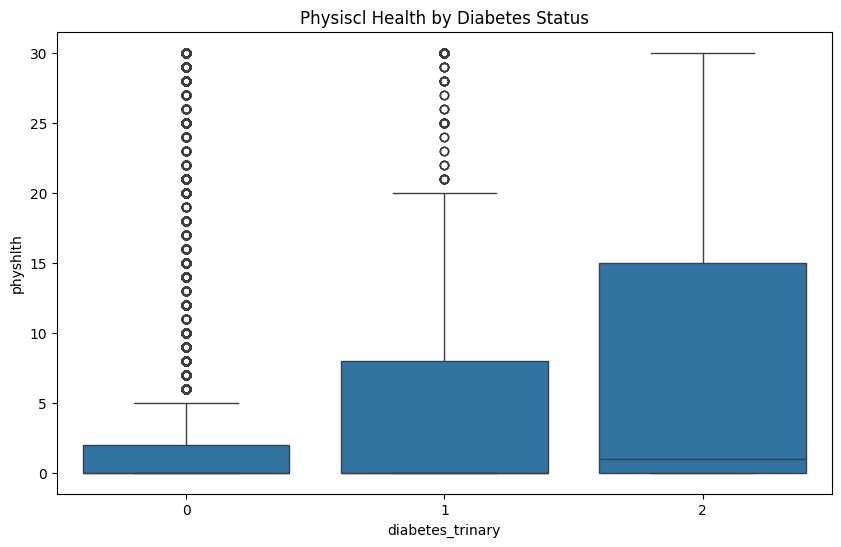

In [36]:
# TODO 4: Stratified distributions

diabetes_map = {
    "No Diabetes": 0,
    "Prediabetes": 1,
    "Diabetes": 2
}
df['diabetes_trinary'] = df["diabetes"].map(diabetes_map)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes_trinary', y='bmi')
plt.title('BMI by Diabetes Status')
plt.savefig('../images/diabetes_bmi_by_target.png', dpi=150)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes_trinary', y='genhlth')
plt.title('General Health by Diabetes Status')
plt.savefig('../images/diabetes_genhlth_by_target.png', dpi=150)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes_trinary', y='menthlth')
plt.title('Mental Health by Diabetes Status')
plt.savefig('../images/diabetes_menthlth_by_target.png', dpi=150)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes_trinary', y='physhlth')
plt.title('Physiscl Health by Diabetes Status')
plt.savefig('../images/diabetes_physhlth_by_target.png', dpi=150)
plt.show()

## 🤔 Reflection

1. **Predictive features:** Which features look most associated with diabetes?
2. **Leakage risk:** Any features that might leak information about the target?
3. **Surprises:** What patterns surprised you?
4. **Next steps:** Which features will you focus on in modeling?

**Your reflection:**

### 1. Predictive Features

**Correlation Analysis:**
- **Strongest correlation:** General Health ↔ Physical Health (0.52)
- **Moderate correlations:** 
  - GenHlth ↔ MentHlth (0.30)
  - MentHlth ↔ PhysHlth (0.35)
- **Weak correlations:** BMI with all health measures (0.09-0.24)
- **Note:** Only 4 numeric features analyzed; categorical relationships not captured by correlation

**BMI and Diabetes:**
- Clear distribution differences across diabetes groups
- Group 0 (No Diabetes): Lower median BMI and smaller spread
- Group 1 & 2 (Diabetes/Prediabetes): Higher median BMI with larger spread
- **Implication:** BMI is a strong predictor and should be included

**General Health by Diabetes Status:**
- Likely scale: 1=Excellent, 2=Very Good, 3=Good, 4=Fair, 5=Poor
- Group 0 (No Diabetes): Median ~2 (very good health)
- Group 1 (Diabetes): Median ~3 (good to fair health)
- Group 2 (Prediabetes): Median ~3.5 (fair health)
- **Finding:** Lower general health ratings associate with higher diabetes risk
- **Note:** Median appears "hidden" when it aligns with box edge (Q1=median for skewed data)

**Mental Health (MentHlth):**
- Distribution dominated by zeros (most people report 0 days of poor mental health)
- Group 0: Mostly 0-5 days
- Groups 1 & 2: Wider spread, up to ~10 days
- Higher mental health struggles in diabetes groups
- Limited predictive power due to sparsity of non-zero values

**Physical Health (PhysHlth):**
- Group 0: Mostly 0-5 days
- **Group 2 (Prediabetes): Most significant increase** — median 2-3 days
- Group 1 (Diabetes): Slightly elevated vs. no diabetes
- Surprising pattern: Prediabetes shows highest physical health burden

### 2. Leakage Risk

**Potential Leaky Features:**
- `genhlth` (General Health): Self-rated health likely reflects existing health conditions
- `physhlth` & `menthlth`: Counts of "bad days" could measure consequences rather than causes

**Decision:** Keep all features for now, monitor feature importance in baseline models. If general health alone achieves near-perfect prediction, it's likely leaking.

**Rationale:** In survey data, perceived health is a complex construct. It may contain legitimate predictive signal rather than pure leakage. Will evaluate during modeling phase.

### 3. Surprising Patterns

1. **Prediabetes physical health:** Unexpectedly high median physical health struggles (2-3 days) compared to diabetes group
2. **BMI distribution spreads:** Diabetes groups show much larger variance in BMI
3. **Mental vs Physical health:** Strong correlation (0.35) suggests holistic approach needed
4. **General health rating:** Clear progressive worsening from no diabetes (2) → diabetes (3-4)

### 4. Next Steps / Features to Focus On

**High Priority Features:**
- **Demographics:** Age, Sex, Education, Income
- **Clinical:** BMI, HighBP, Stroke history
- **Lifestyle:** PhysActivity, Fruits, Veggies, Smoking
- **Health measures:** GenHlth, MentHlth, PhysHlth (with leakage monitoring)

**Medium Priority:**
- CholCheck, NoDocbcCost, AnyHealthcare, DiffWalk

**Approach:** Include all features in baseline models, use feature importance from Random Forest to identify most predictive features, consider removing redundant or leaking variables post-baseline.

## 📌 Summary

✅ **Univariate plots:** Continuous features visualized  
✅ **Correlation heatmap:** Feature relationships mapped  
✅ **Stratified analysis:** Distributions by diabetes status  
✅ **Plots saved:** Exported to `/images/`  
✅ **Ready for next step:** Preprocess and split data

**Next notebook:** `05_preprocessing_splits_balance.ipynb`